# Caso práctico

## Análisis de datos

### Carga y exporación de datos

In [2]:
#importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
#carga de file

data_cp = pd.read_excel("C:/Users/eduar/Downloads/Caso practico.xlsx", sheet_name="Hoja1")
data_cp.head(7)

,Mes,Formato,Tienda,Estado,Area,Venta,Costo,Margen,Desecho,% Desecho,Faltante,% Faltante,Caducado,% Caducado,Total perdida,% Total Perdida
0,Enero,AB,1056,Baja California Sur,Carnico,89332,80398.80,NaN,3450,NaN,5372,NaN,2885,NaN,NaN,NaN
1,Febrero,AEB,1057,Hidalgo,Carnico,90159,80241.51,NaN,3561,NaN,4870,NaN,2753,NaN,NaN,NaN
2,Marzo,MV,1058,Sinaloa,Vegetales,90986,80067.68,NaN,2737,NaN,3084,NaN,2336,NaN,NaN,NaN
3,Abril,AB,1059,Tlaxcala,Vegetales,91813,79877.31,NaN,2954,NaN,3256,NaN,3296,NaN,NaN,NaN
4,Mayo,AEB,1060,Hidalgo,Frutas,92640,79670.40,NaN,4677,NaN,2090,NaN,2156,NaN,NaN,NaN
5,Junio,MV,1061,Estado de MÃ©xico,Frutas,93467,79446.95,NaN,4502,NaN,5067,NaN,2592,NaN,NaN,NaN
6,Julio,AB,1062,Zacatecas,Reposteria,94294,79206.96,NaN,4094,NaN,3862,NaN,2957,NaN,NaN,NaN


#### Cáculo de columnas

In [4]:
#Margen es la ganancia que se obtiene de las ventas menos los costos
#Marge= Venta - Costo

data_cp["Margen"] = data_cp["Venta"]-data_cp["Costo"]
#data_cp.head()

In [5]:
# % DEsecho: indica la proporción de productos que son inservibles o se tiran respecto a ventas total
# % Desecho = (Ventas / Desecho ) * 100
data_cp["% Desecho"] = (data_cp["Desecho"] / data_cp["Venta"] )*100
#data_cp.head()

In [6]:
# % Faltante: es la prporción de productos que no se encuentran respecto a ventas totales
# % Faltantes = (Faltante / Venta ) *100

#data_cp.columns 
#columna FALTANTE tiene espacio, entnces:
data_cp.columns = data_cp.columns.str.strip() # elimina espacios en los nombres



data_cp["% Faltante"] = (data_cp["Faltante"] / data_cp["Venta"] )*100
#data_cp.head()

In [7]:
# % Caducado: es el % de productos que ha expirado su caducidad en relacion a ventas totales
# % Caducado = (Caducado / Ventas )*100

data_cp["% Caducado"] = ( data_cp["Caducado"] / data_cp["Venta"] )* 100
#data_cp.head()

#data_cp.drop("% Caduado", axis=1, inplace=True)

In [8]:
# Total peridad: suma total de las pérdidas
# Total perdida= Desecho + Faltante + Caducado

data_cp["Total perdida"] = data_cp["Desecho"] + data_cp["Faltante"] + data_cp["Caducado"]
#data_cp.head()

In [9]:
# % Total perdida: indica la proporción de las pérdidas totales respecto a ventas totoales
# % Total perdida: ( Total peridad / Venta ) *100

data_cp["% Total Perdida"] = ( data_cp["Total perdida"] / data_cp["Venta"] ) * 100

#elinar columna
#data_cp.drop(["% Total perdida"], axis=1, inplace=True)

data_cp.head()

,Mes,Formato,Tienda,Estado,Area,Venta,Costo,Margen,Desecho,% Desecho,Faltante,% Faltante,Caducado,% Caducado,Total perdida,% Total Perdida
0,Enero,AB,1056,Baja California Sur,Carnico,89332,80398.80,8933.20,3450,3.861998,5372,6.013523,2885,3.229526,11707,13.105046
1,Febrero,AEB,1057,Hidalgo,Carnico,90159,80241.51,9917.49,3561,3.949689,4870,5.401568,2753,3.053494,11184,12.404752
2,Marzo,MV,1058,Sinaloa,Vegetales,90986,80067.68,10918.32,2737,3.008155,3084,3.389532,2336,2.567428,8157,8.965116
3,Abril,AB,1059,Tlaxcala,Vegetales,91813,79877.31,11935.69,2954,3.217409,3256,3.546339,3296,3.589906,9506,10.353654
4,Mayo,AEB,1060,Hidalgo,Frutas,92640,79670.40,12969.60,4677,5.048575,2090,2.256045,2156,2.327288,8923,9.631908


### Limpieza de datos

#### valores nulls

In [10]:
# ttoal del valores null

data_cp.isnull().sum()

Mes                0
Formato            0
Tienda             0
Estado             0
Area               0
Venta              0
Costo              0
Margen             0
Desecho            0
% Desecho          0
Faltante           0
% Faltante         0
Caducado           0
% Caducado         0
Total perdida      0
% Total Perdida    0
dtype: int64

#### imputación de valores

In [11]:
#media_venta = data_cp["Venta"].mean()
#data_cp["Venta"].fillna(media_venta, inplace=True)


#moda_area = data_cp["Area"].mode([0]) #usamo el 1ro con más frecuencia: carnico
#moda_area
#data_cp["Area"].fillna(moda_area, inplace=True)

#### Eliminar duplicados

In [12]:
data_cp.duplicated().sum() #num de duplicados
data_cp.drop_duplicates(inplace=True)

#### Corrección de tipo de datos

In [13]:
#ej:

#data_cp["Venta"] = data_cp["Venta"].astype(float) #int, string


### Estadística descriptiva

In [14]:
data_cp.describe()
#data_cp.describe(include="all")

,Tienda,Venta,Costo,Margen,Desecho,% Desecho,Faltante,% Faltante,Caducado,% Caducado,Total perdida,% Total Perdida
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2555.500000,209374.959000,135953.438790,73421.520210,4014.469333,2.836444,4002.708667,2.849286,3966.201667,2.824394,11983.379667,8.510124
std,866.169729,118153.838084,83781.662067,55059.459445,1157.270718,2.654932,1152.115442,2.794716,1156.333933,2.826973,2004.967309,7.792212
min,1056.000000,14231.000000,8396.290000,2203.100000,2000.000000,0.396144,2000.000000,0.356335,2000.000000,0.344170,6344.000000,1.342496
25%,1805.750000,117650.750000,73222.307500,33346.142500,3006.500000,1.348026,2996.000000,1.334383,2956.500000,1.330764,10560.750000,4.275599
50%,2555.500000,186337.000000,116241.875000,58335.800000,4033.000000,2.061307,3989.500000,2.137116,3910.500000,2.067980,11930.500000,6.388989
75%,3305.250000,276987.500000,180812.332500,98985.807500,5013.000000,3.357862,5013.500000,3.397533,4982.500000,3.326766,13409.500000,10.126917
max,4055.000000,593021.000000,532528.200000,354225.000000,6000.000000,33.422157,5998.000000,36.069036,6000.000000,39.564319,17464.000000,86.869629


* Venta promedio: 209,374.9
* Costo promedio: 135,953.4
* Marge promedio: 73,421.5
* Pérdida promedio: 11,983.3

#### corelación

In [15]:
correlation_cols = ['Venta', 'Costo', 'Margen','Total perdida'] # 'Desecho', 'Faltante', 'Caducado', 
corr_matrix = data_cp[correlation_cols].corr()
print(corr_matrix)

                  Venta     Costo    Margen  Total perdida
Venta          1.000000  0.906552  0.766469       0.010664
Costo          0.906552  1.000000  0.423742       0.009450
Margen         0.766469  0.423742  1.000000       0.008504
Total perdida  0.010664  0.009450  0.008504       1.000000


* Correlación + fuerte entre Venta y costo: a medida que aumenta las ventas auemnta los costos de manera proporcional
* Correlacion + moderada entre venta y marge: mayor venta tiende a generar mayor márgenes
* Correlación + débil entre ventas y pérdidas: las pérdidas no estan muy correlacionadas con el vol de ventas

In [16]:
mes_a_numero = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4,
    'Mayo': 5, 'Junio': 6, 'Julio': 7, 'Agosto': 8,
    'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

# Crear la columna 'Numero_Mes' usando el método .map()
data_cp['Numero_Mes'] = data_cp['Mes'].map(mes_a_numero)

#data_cp["Numero_Mes"].unique()
data_cp.head()

,Mes,Formato,Tienda,Estado,Area,Venta,Costo,Margen,Desecho,% Desecho,Faltante,% Faltante,Caducado,% Caducado,Total perdida,% Total Perdida,Numero_Mes
0,Enero,AB,1056,Baja California Sur,Carnico,89332,80398.80,8933.20,3450,3.861998,5372,6.013523,2885,3.229526,11707,13.105046,1
1,Febrero,AEB,1057,Hidalgo,Carnico,90159,80241.51,9917.49,3561,3.949689,4870,5.401568,2753,3.053494,11184,12.404752,2
2,Marzo,MV,1058,Sinaloa,Vegetales,90986,80067.68,10918.32,2737,3.008155,3084,3.389532,2336,2.567428,8157,8.965116,3
3,Abril,AB,1059,Tlaxcala,Vegetales,91813,79877.31,11935.69,2954,3.217409,3256,3.546339,3296,3.589906,9506,10.353654,4
4,Mayo,AEB,1060,Hidalgo,Frutas,92640,79670.40,12969.60,4677,5.048575,2090,2.256045,2156,2.327288,8923,9.631908,5


#### Análisis de tendecia

In [21]:
import plotly.express as px


# Agrupar por mes y sumar las métricas
monthly_summary = data_cp.groupby('Numero_Mes')[['Venta', 'Desecho', 'Faltante', 'Caducado', 'Total perdida']].sum().reset_index()

# Tendencia de Ventas
fig_venta = px.line(monthly_summary, x='Numero_Mes', y='Venta', title='Tendencia de Ventas Mensuales', markers=True)
fig_venta.show()


In [20]:
# Tendencia de Total Pérdida
fig_perdida = px.line(monthly_summary, x='Numero_Mes', y='Total perdida', title='Tendencia de Pérdida Total Mensual', markers=True)
fig_perdida.show()

#### Análisis comparativo

In [22]:
print("Comparación de Desempeño por formato (Venta y % Pérdida)")

formato_metrics = data_cp.groupby('Formato').agg(
    Venta_Promedio=('Venta', 'mean'),
    Total_Perdida_Promedio=('Total perdida', 'mean'),
    Porcentaje_Perdida_Promedio=('% Total Perdida', 'mean')
).sort_values(by='Venta_Promedio', ascending=False)
print(formato_metrics)


Comparación de Desempeño por formato (Venta y % Pérdida)
         Venta_Promedio  Total_Perdida_Promedio  Porcentaje_Perdida_Promedio
Formato                                                                     
AB           209532.222               11948.869                     8.514907
AEB          209501.706               11951.381                     8.461749
MV           209090.949               12049.889                     8.553716


Comparación de venta promedio por formato


Text(0, 0.5, 'Venta Promedio')

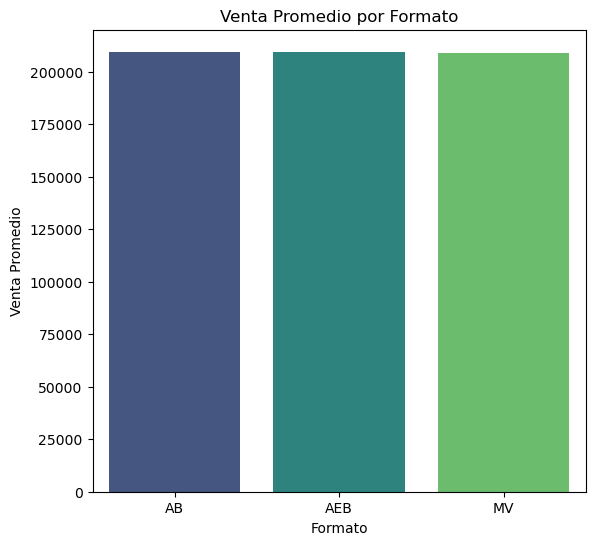

In [25]:
print("Comparación de venta promedio por formato")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=formato_metrics.index, y=formato_metrics['Venta_Promedio'], palette='viridis')
plt.title('Venta Promedio por Formato')
plt.ylabel('Venta Promedio')

In [24]:
print("Comparación de Pérdidas por Área")
area_losses = data_cp.groupby('Area')[['Desecho', 'Faltante', 'Caducado', 'Total perdida']].sum()
print(area_losses.sort_values(by='Total perdida', ascending=False))

Comparación de Pérdidas por Área
                  Desecho  Faltante  Caducado  Total perdida
Area                                                        
Frutas            1770689   1731113   1724366        5226168
Vegetales         1736841   1704158   1736820        5177819
Fuente de sodas   1716114   1749910   1709976        5176000
Pan               1730678   1732143   1689594        5152415
Reposteria        1725096   1720521   1680273        5125890
Carnico           1700910   1705366   1679441        5085717
Pollo             1663080   1664915   1678135        5006130


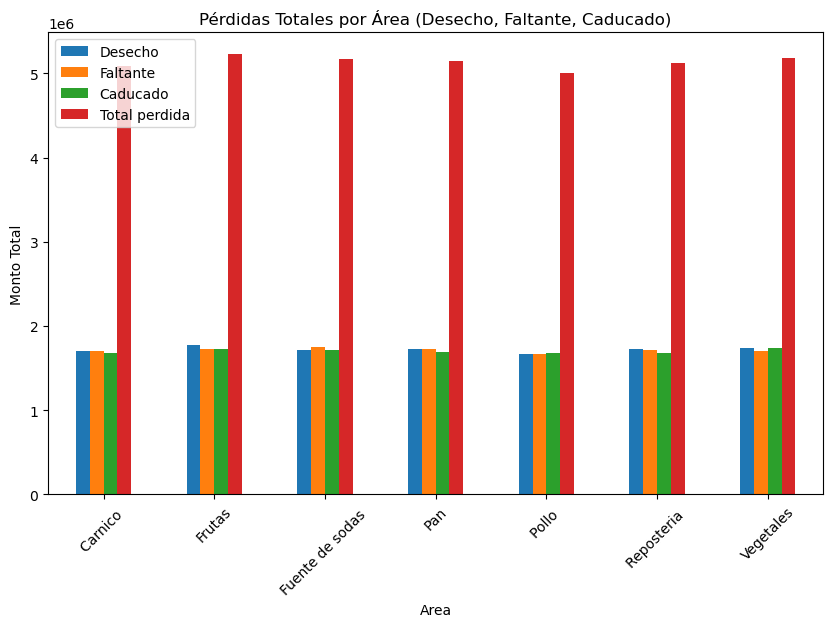

In [27]:
area_losses.plot(kind='bar', figsize=(10, 6), title='Pérdidas Totales por Área (Desecho, Faltante, Caducado)', rot=45)
plt.ylabel('Monto Total')
plt.show()

## Etapa 1

### ¿Cuántos formatos componen la compañía?

In [28]:

formatos_total =data_cp["Formato"].unique() #R:3

print(f"¿Cuántos formatos componen la compañía? {formatos_total}")

¿Cuántos formatos componen la compañía? ['AB' 'AEB' 'MV']


### ¿Cuál es el total de tiendas y cuántas tiendas componen cada formato?

In [29]:
num_tiendas_unicas = len(data_cp["Tienda"].unique()) #3,000 únicas

print(f"¿Cuál es el total de tiendas y cuántas tiendas componen cada formato? {num_tiendas_unicas}")
print()
data_cp.groupby("Formato")["Tienda"].count()#cada formato tiene 1000 tiendas

¿Cuál es el total de tiendas y cuántas tiendas componen cada formato? 3000



Formato
AB     1000
AEB    1000
MV     1000
Name: Tienda, dtype: int64

### ¿Cuáles estados conforman el top 5 de ventas?

In [32]:
#data_cp["Venta"].sum() total ventas: 628,124,877
len(data_cp["Estado"].unique()) #núm de estados: 32

#data_cp.groupby("Estado")["Venta"].sum() #.sort_values(ascending=False).head(5)

print("¿Cuáles estados conforman el top 5 de ventas?")
data_cp.groupby("Estado")["Venta"].sum().sort_values(ascending=False).head(5)

¿Cuáles estados conforman el top 5 de ventas?


Estado
Oaxaca                  25974409
Tlaxcala                24707088
Estado de MÃ©xico       24679123
MichoacÃ¡n de Ocampo    23262806
Colima                  22648421
Name: Venta, dtype: int64

### Determina las ventas y costos totales por área.

In [33]:
print("Determina las ventas y costos totales por área: ")
venta_costo_area = data_cp.groupby("Area")[["Venta", "Costo"]].sum().sort_values(by="Venta", ascending=False)
venta_costo_area

Determina las ventas y costos totales por área: 


,Venta,Costo
Area,,
Pan,90847414,59344262.30
Fuente de sodas,90794382,58752868.65
Reposteria,90740574,58777954.82
Frutas,90103974,58489846.82
Vegetales,89467374,58078974.98
Carnico,89394818,58162235.93
Pollo,86776341,56254172.87


### Con base a los datos de ventas y costos determina el margen para cada tienda.

In [34]:
venta_costo_area["Margen_area"] = venta_costo_area["Venta"] - venta_costo_area["Costo"]

print("Con base a los datos de ventas y costos determina el margen para cada tienda: ")
venta_costo_area

#venta_costo_area.sort_values(by="Margen_area", ascending=False)

Con base a los datos de ventas y costos determina el margen para cada tienda: 


,Venta,Costo,Margen_area
Area,,,
Pan,90847414,59344262.30,31503151.70
Fuente de sodas,90794382,58752868.65,32041513.35
Reposteria,90740574,58777954.82,31962619.18
Frutas,90103974,58489846.82,31614127.18
Vegetales,89467374,58078974.98,31388399.02
Carnico,89394818,58162235.93,31232582.07
Pollo,86776341,56254172.87,30522168.13


### Determina los % para los rubros de Desecho, Faltante y Caducado para cada tienda, así como el monto Total Perdida y %.


In [35]:
info_x_tienda = data_cp[["Tienda", "% Desecho", "% Faltante", "% Caducado", "Total perdida", "% Total Perdida"]]

print("Determina los % para los rubros de Desecho, Faltante y Caducado para cada tienda, así como el monto Total Perdida y %.")
info_x_tienda #tenemos 3000 tiendas

Determina los % para los rubros de Desecho, Faltante y Caducado para cada tienda, así como el monto Total Perdida y %.


,Tienda,% Desecho,% Faltante,% Caducado,Total perdida,% Total Perdida
0,1056,3.861998,6.013523,3.229526,11707,13.105046
1,1057,3.949689,5.401568,3.053494,11184,12.404752
2,1058,3.008155,3.389532,2.567428,8157,8.965116
3,1059,3.217409,3.546339,3.589906,9506,10.353654
4,1060,5.048575,2.256045,2.327288,8923,9.631908
...,...,...,...,...,...,...
2995,4051,3.383166,4.944328,3.724792,12383,12.052285
2996,4052,4.079439,5.172648,2.426555,12061,11.678641
2997,4053,5.018111,3.174251,2.523024,11123,10.715387
2998,4054,5.141181,5.569613,4.916901,16305,15.627696


### Determina el área con mayor monto de total perdida.

In [36]:
perdida_x_area = data_cp.groupby("Area")[["Total perdida"]].sum().sort_values(by="Total perdida", ascending=False)

print("Determina el área con mayor monto de total perdida")
perdida_x_area

Determina el área con mayor monto de total perdida


,Total perdida
Area,
Frutas,5226168
Vegetales,5177819
Fuente de sodas,5176000
Pan,5152415
Reposteria,5125890
Carnico,5085717
Pollo,5006130


### Determina el área con menor monto de Desecho.

In [37]:
desecho_x_area = data_cp.groupby("Area")[["Desecho"]].sum().sort_values(by="Desecho", ascending=False)

print("Determina el área con menor monto de Desecho")
desecho_x_area


Determina el área con menor monto de Desecho


,Desecho
Area,
Frutas,1770689
Vegetales,1736841
Pan,1730678
Reposteria,1725096
Fuente de sodas,1716114
Carnico,1700910
Pollo,1663080


In [38]:
#Guradar y descargar dataset
import os 
nombre_archivo = 'caso_practico_final.csv'
ruta = "C:/Users/eduar/Downloads"
ruta_completa = os.path.join(ruta, nombre_archivo)


data_cp.to_csv(ruta_completa, index=False, encoding='utf-8-sig', sep=',')

print(f"Dataset guardado exitosamente en: '{ruta_completa}'")

Dataset guardado exitosamente en: 'C:/Users/eduar/Downloads\caso_practico_final.csv'


## Etapa 2

In [52]:
### hacer un dashboard-->

In [39]:
data_cp.head()

,Mes,Formato,Tienda,Estado,Area,Venta,Costo,Margen,Desecho,% Desecho,Faltante,% Faltante,Caducado,% Caducado,Total perdida,% Total Perdida,Numero_Mes
0,Enero,AB,1056,Baja California Sur,Carnico,89332,80398.80,8933.20,3450,3.861998,5372,6.013523,2885,3.229526,11707,13.105046,1
1,Febrero,AEB,1057,Hidalgo,Carnico,90159,80241.51,9917.49,3561,3.949689,4870,5.401568,2753,3.053494,11184,12.404752,2
2,Marzo,MV,1058,Sinaloa,Vegetales,90986,80067.68,10918.32,2737,3.008155,3084,3.389532,2336,2.567428,8157,8.965116,3
3,Abril,AB,1059,Tlaxcala,Vegetales,91813,79877.31,11935.69,2954,3.217409,3256,3.546339,3296,3.589906,9506,10.353654,4
4,Mayo,AEB,1060,Hidalgo,Frutas,92640,79670.40,12969.60,4677,5.048575,2090,2.256045,2156,2.327288,8923,9.631908,5


In [53]:
#Mapa de calor para los rubros de ventas y total perdida

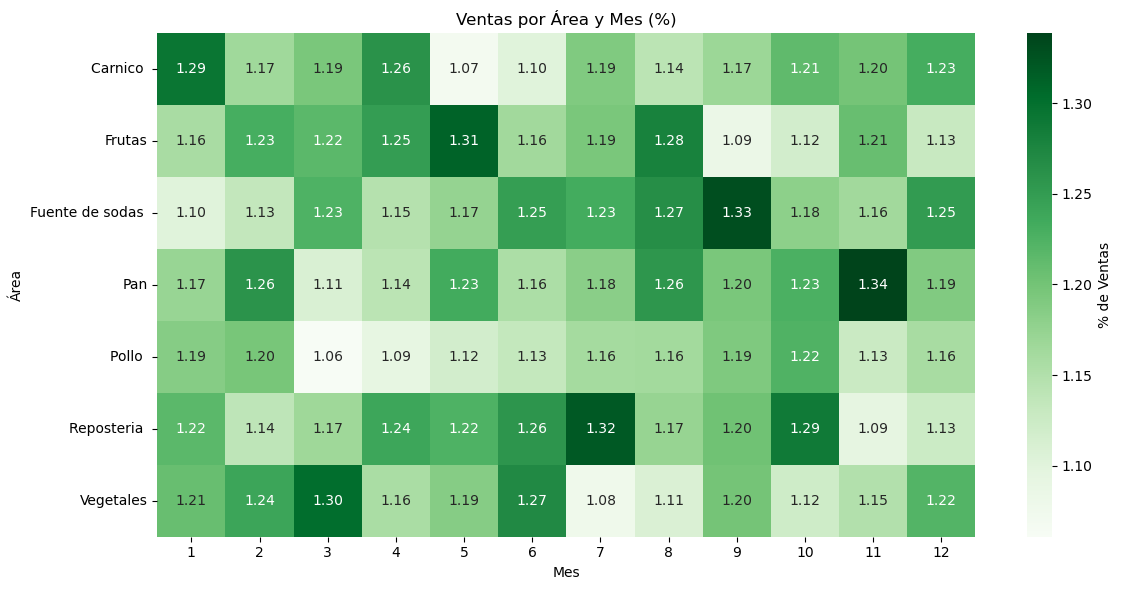

In [51]:
# Agrupar: Ventas por Área y Mes
ventas_heatmap = data_cp.groupby(['Area', 'Numero_Mes'])['Venta'].sum().unstack(fill_value=0)

# Calcular porcentaje respecto al total general
ventas_pct = ventas_heatmap / ventas_heatmap.values.sum() * 100

# Graficar el heatmap en porcentaje
plt.figure(figsize=(12, 6))
sns.heatmap(ventas_pct, annot=True, fmt='.2f', cmap='Greens', cbar_kws={'label': '% de Ventas'})
plt.title('Ventas por Área y Mes (%)')
plt.xlabel('Mes')
plt.ylabel('Área')
plt.tight_layout()
plt.show()


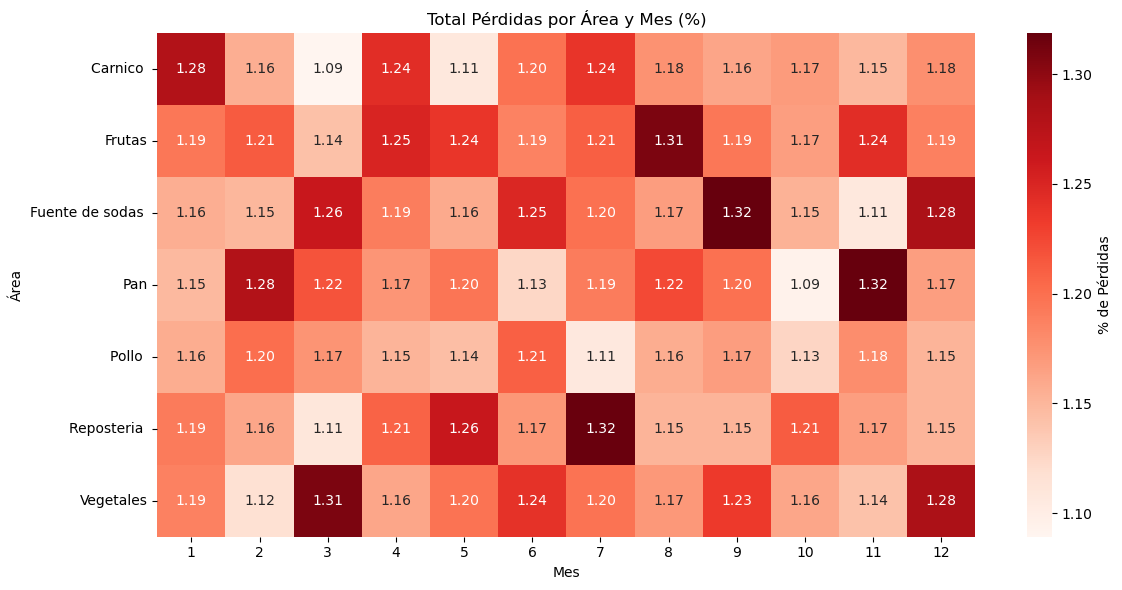

In [48]:
# Agrupar: Pérdidas por Área y Mes
perdidas_heatmap = data_cp.groupby(['Area', 'Numero_Mes'])['Total perdida'].sum().unstack(fill_value=0)

# Calcular porcentaje respecto al total general de pérdidas
perdidas_pct = perdidas_heatmap / perdidas_heatmap.values.sum() * 100

# Graficar el heatmap en porcentaje, mismo formato que ventas
plt.figure(figsize=(12, 6))
sns.heatmap(perdidas_pct, annot=True, fmt='.2f', cmap='Reds', cbar_kws={'label': '% de Pérdidas'})
plt.title('Total Pérdidas por Área y Mes (%)')
plt.xlabel('Mes')
plt.ylabel('Área')
plt.tight_layout()
plt.show()


In [55]:
formato_mensual

,Numero_Mes,Formato,Desecho,Faltante,Caducado
0,1,AB,1025077,989092,975183
1,2,AEB,1001128,977299,997542
2,3,MV,977857,1019218,988797
3,4,AB,993278,1004982,1014140
4,5,AEB,1012691,984029,989000
5,6,MV,1021965,998102,993198
6,7,AB,1033461,1006155,1001502
7,8,AEB,1005457,1002289,996183
8,9,MV,1004194,1028694,997044
9,10,AB,963041,1002283,940675


In [49]:
#Comportamiento mensual por formato del Desecho, Faltante y Caducado 

area_mensual = data_cp.groupby(["Numero_Mes", "Area"])["Total perdida"].sum().reset_index()
fig = px.bar(area_mensual, x="Numero_Mes", y="Total perdida", color="Area", barmode="group",
             title="Total Perdida mensual por Área")
fig.show()